In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
housing_data = pd.read_csv("datasets/housing.csv")

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9037,-117.96,34.71,32.0,3511.0,646.0,1733.0,510.0,3.4600,123900.0,INLAND
12975,-121.33,38.66,17.0,2767.0,584.0,1275.0,568.0,2.5909,125400.0,INLAND
15508,-117.08,33.14,11.0,1430.0,292.0,921.0,294.0,4.2357,160900.0,<1H OCEAN
1545,-121.93,37.73,8.0,831.0,231.0,404.0,224.0,3.3750,350000.0,<1H OCEAN
13094,-121.36,38.56,20.0,1232.0,332.0,667.0,288.0,1.8288,32500.0,INLAND


In [6]:
housing_data = housing_data.dropna()
housing_data.shape

(20433, 10)

In [7]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
housing_data[housing_data["median_house_value"] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [14]:
housing_data = housing_data.drop(housing_data.loc[housing_data["median_house_value"] == 500001].index)

In [15]:
housing_data.shape

(19475, 10)

In [18]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
housing_data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [20]:
housing_data = pd.get_dummies(housing_data, columns = ["ocean_proximity"])

In [21]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
3784,-118.38,34.16,46.0,2609.0,593.0,1055.0,585.0,3.3177,309400.0,1,0,0,0,0
19876,-119.31,36.33,46.0,1636.0,338.0,772.0,332.0,2.4250,84900.0,0,1,0,0,0
7215,-118.17,34.02,39.0,759.0,215.0,883.0,226.0,2.1250,143800.0,1,0,0,0,0
9194,-119.51,37.32,14.0,362.0,78.0,88.0,39.0,3.5893,214300.0,0,1,0,0,0
18396,-121.77,37.23,15.0,4713.0,769.0,2519.0,778.0,5.6958,253800.0,1,0,0,0,0


In [22]:
X = housing_data.drop("median_house_value", axis = 1)
Y = housing_data["median_house_value"]

In [23]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [29]:
x_train.shape, y_train.shape

((15580, 13), (15580,))

Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(fit_intercept = False).fit(x_train, y_train)

In [34]:
print("Training score:", linear_model.score(x_train, y_train))

Training score: 0.6074642433151227


In [36]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [41]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
coef

ocean_proximity_INLAND       -2.156714e+06
ocean_proximity_NEAR BAY     -2.123027e+06
ocean_proximity_<1H OCEAN    -2.117275e+06
ocean_proximity_NEAR OCEAN   -2.113844e+06
ocean_proximity_ISLAND       -1.952707e+06
longitude                    -2.478369e+04
latitude                     -2.279716e+04
population                   -3.036772e+01
total_rooms                  -6.662792e+00
households                    3.840421e+01
total_bedrooms                9.263550e+01
housing_median_age            8.768092e+02
median_income                 3.804062e+04
dtype: float64

In [42]:
y_pred = linear_model.predict(x_test)

In [44]:
df_pred_actual = pd.DataFrame({"Predicted": y_pred, "actual": y_test})
df_pred_actual.head(10)

,Predicted,actual
284,225035.693143,157300.0
18992,185784.910975,298400.0
6116,200189.681456,138200.0
7410,137232.422032,154000.0
16930,226968.987961,256300.0
11971,110643.699510,95200.0
3435,116025.348257,136400.0
5027,215121.270367,140300.0
4706,235585.464576,327300.0
1987,75907.981903,49600.0


In [47]:
from sklearn.metrics import r2_score

print("Testing_score:", r2_score(y_test, y_pred))

Testing_score: 0.6345076889945768


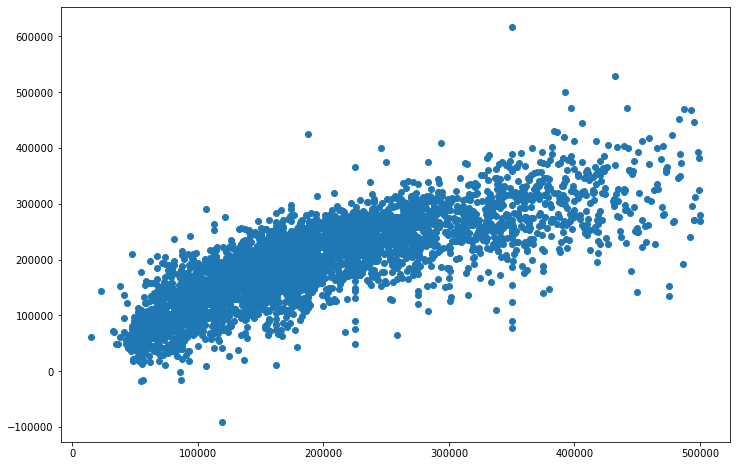

In [48]:
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(y_test, y_pred)
plt.show(
)